# Week3 - Homework

Write a rule based predictor for the dataset below. 

Choose one of the following datasets and do your EDA. 
Test your assumptions. 

Finally write your code in `predict_one` function. 

Do __NOT__ change the function signature! This function should only take name and return `F` or `M`

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

us_names = 'https://raw.githubusercontent.com/msaricaumbc/DS_data/master/ds602/names/us_names.csv'

df = pd.read_csv(us_names)
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36277 entries, 0 to 36276
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   name    36277 non-null  object
 1   gender  36277 non-null  object
dtypes: object(2)
memory usage: 567.0+ KB


In [2]:
df.gender.value_counts()

gender
F    21789
M    14488
Name: count, dtype: int64

Not balanced! For simplicity, let's create a sub sample that will contains equal F and M.

In [3]:
min_count = min(df['gender'].value_counts())

df_f = df[df['gender'] == 'F'].sample(min_count, random_state=42)
df_m = df[df['gender'] == 'M'].sample(min_count, random_state=42)

df = pd.concat([df_f, df_m]).reset_index(drop=True)

In [4]:
df.gender.value_counts()

gender
F    14488
M    14488
Name: count, dtype: int64

In [5]:
df.head()

,name,gender
0,Brennen,F
1,Chikaima,F
2,Zoejane,F
3,Teegan,F
4,Alanda,F


## Part1:

Run experiments to select which rules are good seperator for gender.

### Two examples:

### 1. Example 1 based on vowel letters

In [6]:
# checking if the last digit is actually vowel or not
df['is_last_letter_vowel'] = [  name[-1:] in 'aeiou' for name in df.name]

In [7]:
df

,name,gender,is_last_letter_vowel
0,Brennen,F,False
1,Chikaima,F,True
2,Zoejane,F,True
3,Teegan,F,False
4,Alanda,F,True
...,...,...,...
28971,Arther,M,False
28972,Jamani,M,True
28973,Mickeal,M,False
28974,Chad,M,False


<AxesSubplot: xlabel='is_last_letter_vowel', ylabel='count'>

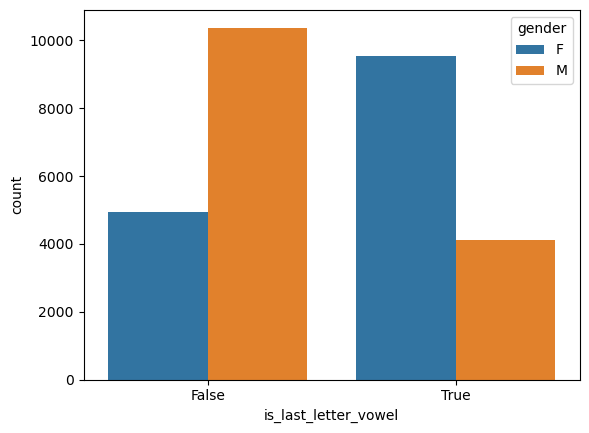

In [8]:
import seaborn as sns

sns.countplot(data = df, x = 'is_last_letter_vowel', hue = 'gender')

Majority of Women seem to have vowel in their last character of name. Lets check accuracy for a rule-based approach with this technique

In [9]:
is_vowel = df["is_last_letter_vowel"]

In [10]:
df['predicted_gender'] = np.where(is_vowel, 'F', 'M')

In [11]:
sum(df["gender"] == df["predicted_gender"])/ df.shape[0] * 100

68.8017669795693

By just checking whether the ending is vowel or not, we were able to increaes accuracy from 50% to almost 69%

### 2. Second Example based on the length of name

<AxesSubplot: xlabel='len', ylabel='count'>

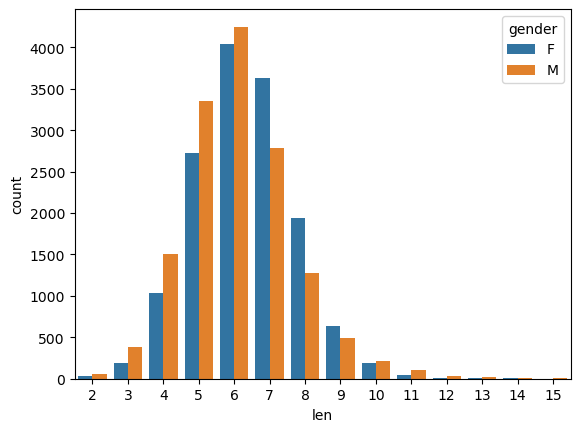

In [12]:
df['len'] = [ len(name) for name in df.name]
sns.countplot(data = df, x = 'len', hue = 'gender')

Seems like length doesn't also seem like a good separator

### 3. Let's check  based on the First character of the Name

In [13]:
df = df[["name", "gender", "is_last_letter_vowel", "predicted_gender"]]

In [14]:
# lets look at the distribution of names by first letter but also at the same time their gender.
# I know from personal experience that female names tend to start a lot with A, M, S, (Asmita, Manisha, Sunita) They are my sisters back in Nepal actually.
df['first_letter'] = df['name'].str[0]

In [15]:
df['first_letter'].value_counts()

first_letter
A    3114
J    2243
M    2219
S    2218
K    2151
D    1799
C    1712
L    1578
T    1540
R    1395
E    1259
B    1190
N     976
H     813
G     759
Y     532
P     513
I     504
Z     488
V     466
F     440
O     428
W     352
Q     124
X      83
U      80
Name: count, dtype: int64

<b> As I thought, A, M and S are most prominent for first character in female names. lets look at the plot

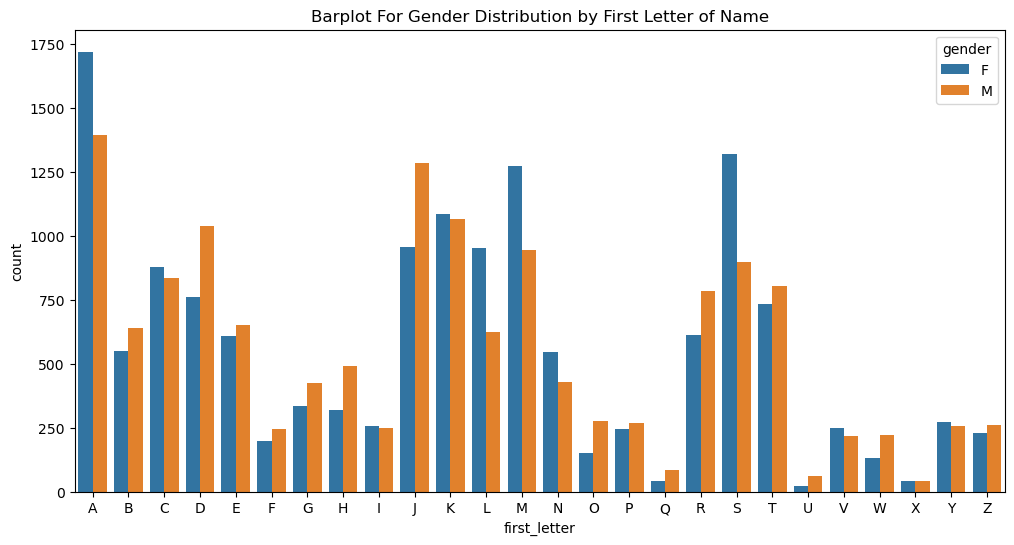

In [16]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='first_letter', hue='gender', order=sorted(df['first_letter'].unique()))
plt.title('Barplot For Gender Distribution by First Letter of Name')
plt.show()

This is interesting. What if we select top 3 cases (A, M and S) and just make any name that start with these characters as Female, and anyone with their name ends with AEIOU (vowel characters) as Female and rest as male. Also, lets check accuracy for that

In [17]:
df

,name,gender,is_last_letter_vowel,predicted_gender,first_letter
0,Brennen,F,False,M,B
1,Chikaima,F,True,F,C
2,Zoejane,F,True,F,Z
3,Teegan,F,False,M,T
4,Alanda,F,True,F,A
...,...,...,...,...,...
28971,Arther,M,False,M,A
28972,Jamani,M,True,F,J
28973,Mickeal,M,False,M,M
28974,Chad,M,False,M,C


In [18]:
df['is_first_letter_AMS'] = df['first_letter'].apply(lambda x : x[0] in 'AMS')

In [19]:
is_vowel_or_AMS = df["is_last_letter_vowel"] | df["is_first_letter_AMS"]

In [20]:
df['predicted_gender'] = np.where(is_vowel_or_AMS, 'F', 'M')

In [21]:
sum(df["gender"] == df["predicted_gender"])/ df.shape[0] * 100

66.12368856985091

### 4. Consonant and Vowel Count Based Name Classification.

In [22]:
# get the count of available vowel characters in the name column
df["Vowel_Count"] = df["name"].apply(lambda x: sum([1 for i in x if i in 'aeiou']))

# get the count of available consonant characters in the name column
df["Consonant_Count"] = df["name"].apply(lambda x: sum([1 for i in x if i not in 'aeiou']))

In [23]:
df.head()

,name,gender,is_last_letter_vowel,predicted_gender,first_letter,is_first_letter_AMS,Vowel_Count,Consonant_Count
0,Brennen,F,False,M,B,False,2,5
1,Chikaima,F,True,F,C,False,4,4
2,Zoejane,F,True,F,Z,False,4,3
3,Teegan,F,False,M,T,False,3,3
4,Alanda,F,True,F,A,True,2,4


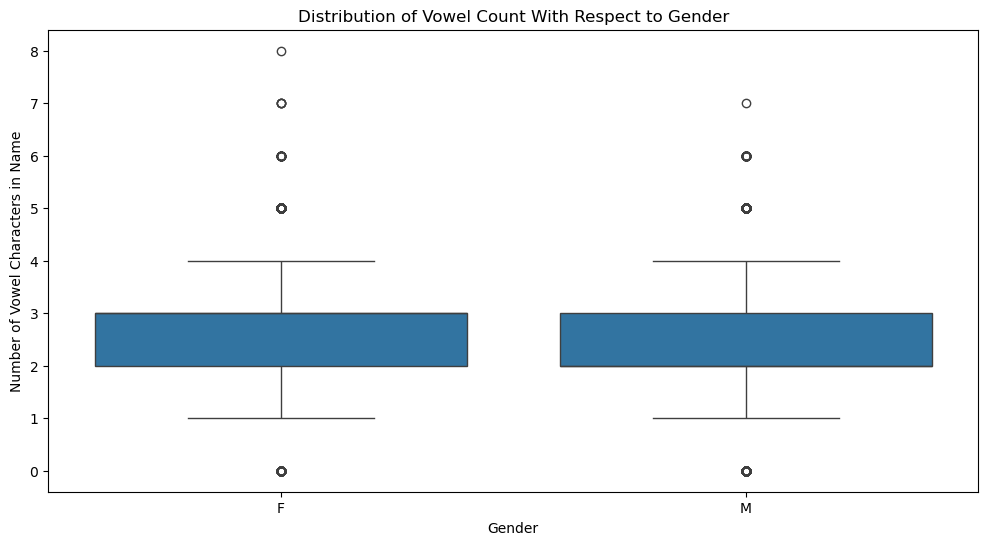

In [24]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='gender', y= "Vowel_Count", data=df)
plt.title('Distribution of Vowel Count With Respect to Gender')
plt.xlabel("Gender")
plt.ylabel("Number of Vowel Characters in Name")
plt.show()

Well, there does not seem to be much of a relation between the number of vowel characters and the name for either of the gender. So, this is not really useful. Lets check for consonants.

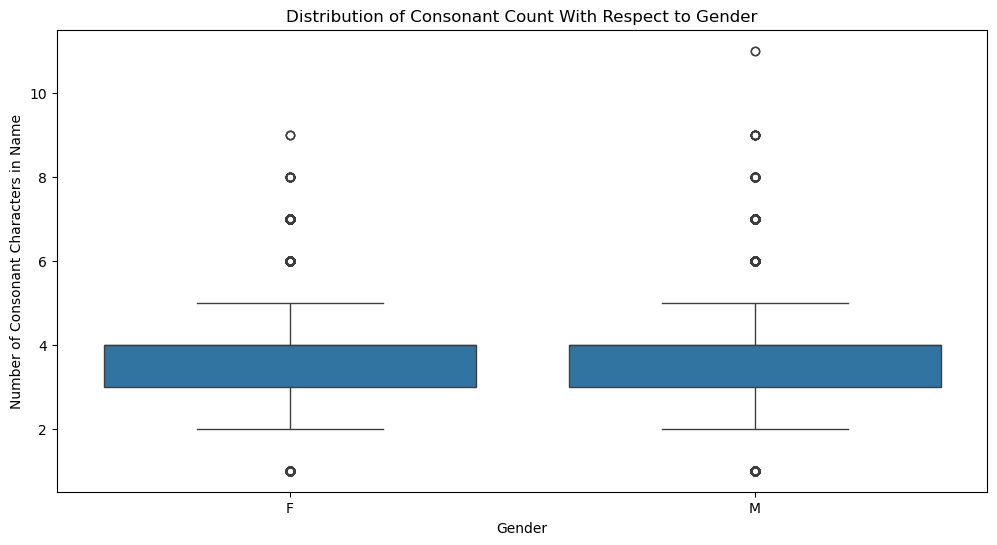

In [25]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='gender', y= "Consonant_Count", data=df)
plt.title('Distribution of Consonant Count With Respect to Gender')
plt.xlabel("Gender")
plt.ylabel("Number of Consonant Characters in Name")
plt.show()

Well, there does not seem to be much of a relation between the number of Consonant characters and the name for either of the gender. So, this is not really useful as well. Let's explore other techniques.

# 5. Syllables Count Vs Gender

Lets check the syllables each name has and check if there is a relationship

In [26]:
'''
This functionn, by no means is perfect. I found a great reference starting point from the following stack overflow quesiton:
https://stackoverflow.com/questions/46759492/syllable-count-in-python
'''

# y can be considered a vowel when pronouncing a name
# for instance,  Emily, Lily, Mary, etc.
# Em, i, ly (here, y sounds liks a vowel as i or e emili or emilie. So, for the purpose of counting syllables, - 
# i will use y as a vowel as well
vowel_character = "aeiouy" 

def get_syllable_count(name):
    count = 0

    # first charcter
    first_character = name[0]
    if first_character in vowel_character:
        count += 1
    
    # checking for second to last second characters. 
    # According to the syllable count method, we know that if current character is a vowel -
    # but the previous character is not a vowel, then it can be considered as a syllable
    for i in range(1, len(name)):
        if name[i] in vowel_character and name[i-1] not in vowel_character:
            count += 1

    
    # check if the last character ends with one of the vowel characters. If so, 
    # then it is also a syllable
    if name[-1] in vowel_character:
        count += 1

    # if none of the above conditions are met, then the name -
    # - can be 1 syllable
    if count == 0:
        return 1
    
    return count

In [27]:
# counting the syllable
df["syllable_count"] = df["name"].apply(get_syllable_count)

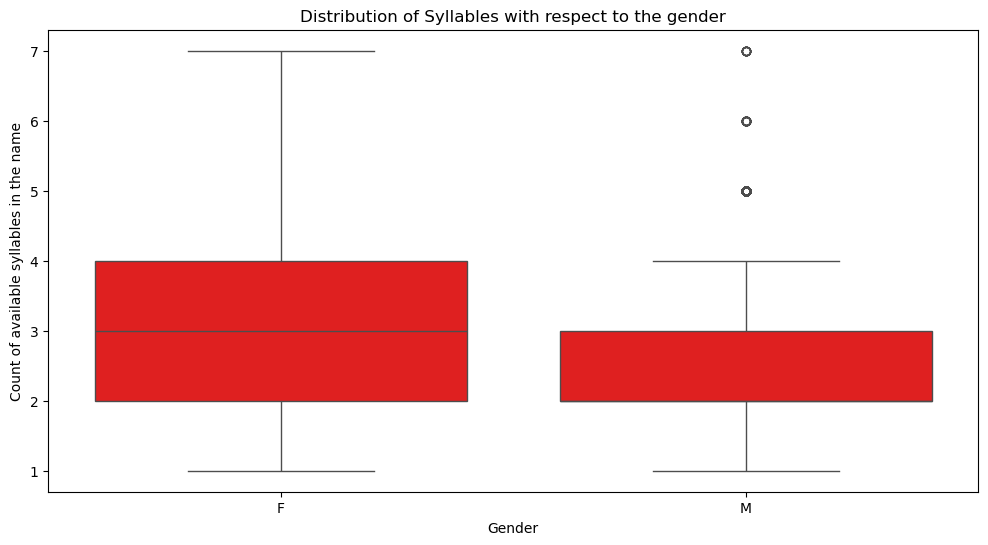

In [28]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='gender', y='syllable_count', data=df, color='red')
plt.title('Distribution of Syllables with respect to the gender')
plt.xlabel('Gender')
plt.ylabel('Count of available syllables in the name')
plt.show()

Interesting. If we look at the boxplot properly, the median of the female syllable count is even bigger than 3rd quartile of the syllable count of men. Which means, top 50% of the female names had higher syllable count than the 75% of the male names.

<b> From the boxplot, we can also see that males generally tend to have less than 3 syllable count. We could use this threshold to determine gender, given a name. Lets try this

In [29]:
df["gender_based_on_syllables_count"] = df["syllable_count"].apply(lambda x: "M" if x <=3 else "F")

In [30]:
sum(df["gender"] == df["gender_based_on_syllables_count"])/ df.shape[0] * 100

59.58034235229155

<b> Well, that actually bad. Lets make the threshold stricter.

In [31]:
df["gender_based_on_syllables_count"] = df["syllable_count"].apply(lambda x: "M" if x <=2.5 else "F")

In [32]:
sum(df["gender"] == df["gender_based_on_syllables_count"])/ df.shape[0] * 100

67.73191606847045

<b> Improved, because females generally tend to have higher syllable. What if we go even higher?

In [33]:
threshold = []
accuracy = []
for i in np.arange(0, 4, 0.1): 
    df["gender_based_on_syllables_count"] = df["syllable_count"].apply(lambda x: "M" if x <=i else "F")
    accuracy.append(sum(df["gender"] == df["gender_based_on_syllables_count"])/ df.shape[0] * 100)
    threshold.append(i)

Text(0, 0.5, 'Accuracy')

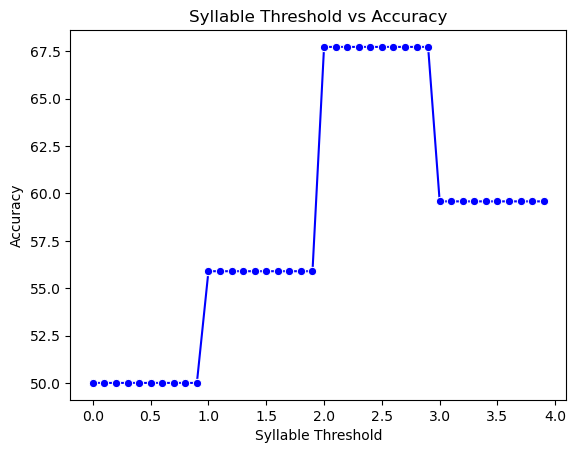

In [34]:
sns.lineplot(x=threshold, y=accuracy, marker = "o", color='blue')
plt.title("Syllable Threshold vs Accuracy")
plt.xlabel("Syllable Threshold")
plt.ylabel("Accuracy")

<b> Well, we get highest accuracy at 2.5. Let's keep it that way. Lets also combine this to the previous rule based method to see if we can increase the accuracy.

In [35]:
# '''
# These three rule based methods have had the highest accuracy so far. lets see if we can combine them to get a better accuracy
# '''
# mask = df["is_last_letter_vowel"] | df["is_first_letter_AMS"] | (df["syllable_count"] <= 2.5)
# sum(df["gender"] == np.where(mask, 'F', 'M')) / df.shape[0] * 100

In [37]:
'''
If last letter vowel: Female
if first letter either A, M or S: female
if syllable count > 2.5, then female/
'''
mask = df["is_last_letter_vowel"] | df["is_first_letter_AMS"] | (df["syllable_count"] > 2.5)

df['predicted_gender_combined'] = np.where(mask, 'F', 'M')

sum(df["gender"] == df["predicted_gender_combined"]) / df.shape[0] * 100

65.21604086140253

<b> we know that females generally tend to have higher syllable count and females generally tend to have last letter vowel. What if we use those two only?

In [64]:
mask = df["is_last_letter_vowel"] & (df["syllable_count"] > 1.5)

df['predicted_gender_combined'] = np.where(mask, 'F', 'M')

sum(df["gender"] == df["predicted_gender_combined"]) / df.shape[0] * 100

C:\Users\neupa\AppData\Local\Temp\ipykernel_20260\888994637.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['predicted_gender_combined'] = np.where(mask, 'F', 'M')


68.8017669795693

<b> well, the accuracy slightl reduced.

In [38]:
df = df[["name", "gender", "is_last_letter_vowel", "is_first_letter_AMS", "syllable_count"]]

In [45]:
df

,name,gender,is_last_letter_vowel,is_first_letter_AMS,syllable_count
0,Brennen,F,False,False,2
1,Chikaima,F,True,False,4
2,Zoejane,F,True,False,4
3,Teegan,F,False,False,2
4,Alanda,F,True,True,3
...,...,...,...,...,...
28971,Arther,M,False,True,1
28972,Jamani,M,True,False,4
28973,Mickeal,M,False,True,2
28974,Chad,M,False,False,1


## Part2

Write the inference function based on the findings...

In [ ]:
def predict_one(name): # <-- (Don't change the function signature) DO NOT CHANGE THIS LINE
    # write your codes below this line....
    
    return 'M'

# print(predict_one('Jasmine'))

In [ ]:
## DO NOT CHANGE ANYTHING IN THIS CELL!!!
predictions = [ predict_one(name) for name in df.name]
accuracy = sum(df.gender == predictions) / len(df)
print(f"Accuracy: {accuracy}")

## Part3 


Write the above function in one of the following languages:
1. javascript
2. sql

For javascript:

The following is the starter code. 

* Open a new file in week3 folder name it `name_predictor.html`

* Fill the `predictOne` function based on the function above

* Save and double click on the html file to test it.


For sql:

The following is a sample function code for postgres. 
If you don't have a database engine installed on your computer, you can use: https://onecompiler.com/

If you already have a local server, use that to create a function that contains the logic you came up with.
